In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


In [4]:
!wget -O iris.csv https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/iris.csv

--2021-09-29 15:21:33--  https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4761 (4.6K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.65K  --.-KB/s    in 0s      

2021-09-29 15:21:33 (32.0 MB/s) - ‘iris.csv’ saved [4761/4761]



In [25]:
df = pd.read_csv('iris.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f967186ba10>]],
      dtype=object)

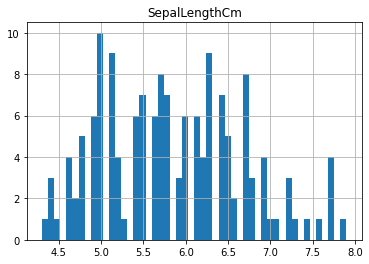

In [6]:
df.hist(column='SepalLengthCm', bins=50)

In [7]:
df.columns
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']].values
x[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
#mendifinisikan label
y = df['Label'].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [11]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)
print('Train set : ',x_train.shape, y_train.shape)
print('Test set : ',x_test.shape, y_test.shape)


Train set :  (120, 4) (120,)
Test set :  (30, 4) (30,)


In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
k=4
#train model dan prediction
knn = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [17]:
yhat = knn.predict(x_test)
yhat[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [19]:
from sklearn import metrics
print("Train set accuracy : ",metrics.accuracy_score(y_train, knn.predict(x_train)))
print("Test set accuracy : ",metrics.accuracy_score(y_test,yhat))


Train set accuracy :  0.9666666666666667
Test set accuracy :  0.9333333333333333


In [21]:
ks = 20
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
confutionMax = [];
for n in range (1,ks):
  #train model and predict
  neighbor = KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
  yhat=neighbor.predict(x_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
  std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.9       , 0.93333333, 0.9       , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333])

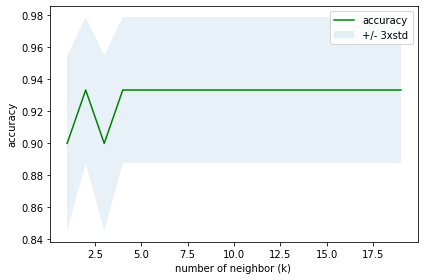

In [23]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('accuracy', '+/- 3xstd'));
plt.ylabel('accuracy');
plt.xlabel('number of neighbor (k) ');
plt.tight_layout();
plt.show()

In [24]:
print("Akurasi terbaik adalah : ",mean_acc.max(), "dengan k = ",mean_acc.argmax()+1)

Akurasi terbaik adalah :  0.9333333333333333 dengan k =  2
